<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [19]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences,dimension=20):
    result = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        result[i,sequence]=1  
    return result

In [4]:
x_train=vectorize_sequences(train_data,dimension=10000)
x_test=vectorize_sequences(test_data,dimension=10000)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
def network(input_dim):
    net=keras.models.Sequential()
    net.add(keras.layers.Dense(50,activation='relu',input_shape=(input_dim,)))
    net.add(keras.layers.Dense(30,activation='relu'))
    net.add(keras.layers.Dropout(rate=0.01))
    net.add(keras.layers.Dense(1,activation='sigmoid'))
    net.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
                loss=keras.losses.binary_crossentropy,
                metrics=[keras.metrics.binary_accuracy])
    return net

In [7]:
x_validate = x_train[:10000]
x_train = x_train[10000:]
y_validate  = y_train[:10000]
y_train = y_train[10000:]

In [8]:
class MyCallBack(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        print("Starting training; got log keys: {}".format(logs))

    def on_train_end(self, logs=None):
        print("\n The model is now trained")
    
    def on_epoch_begin(self, epoch, logs=None):
        print('\n begining of epoch {} \n'.format(epoch+1))
       
    def on_epoch_end(self,epoch,logs={}):
        print("\n Finished traing epoch {} \n".format(epoch+1))
    
cc=MyCallBack()

In [9]:
model=network(input_dim=10000)

In [10]:
history=model.fit(x_train,y_train,batch_size=500,epochs=2,validation_data=(x_validate,y_validate),
                 callbacks=[cc])

Train on 15000 samples, validate on 10000 samples
Starting training; got log keys: None

 begining of epoch 1 

Epoch 1/2
14500/15000 [============================>.] - ETA: 0s - loss: 0.6275 - binary_accuracy: 0.7187
 Finished traing epoch 1 

15000/15000 [==============================] - 20s 1ms/sample - loss: 0.6189 - binary_accuracy: 0.7231 - val_loss: 0.3363 - val_binary_accuracy: 0.8712

 begining of epoch 2 

Epoch 2/2
14500/15000 [============================>.] - ETA: 0s - loss: 0.2896 - binary_accuracy: 0.8855
 Finished traing epoch 2 

15000/15000 [==============================] - 7s 494us/sample - loss: 0.2876 - binary_accuracy: 0.8863 - val_loss: 0.3630 - val_binary_accuracy: 0.8596

 The model is now trained


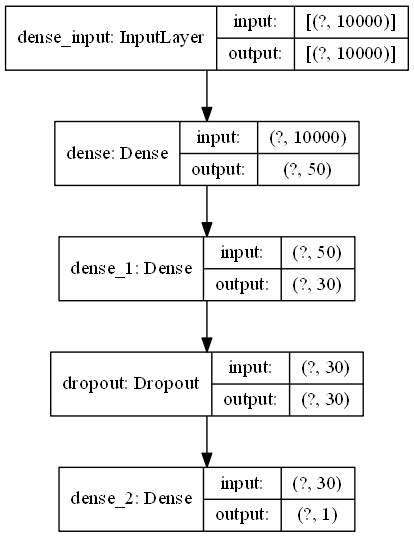

In [11]:
keras.utils.plot_model(model=model,show_shapes=True,dpi=100)

# SAVING MODELS

In [20]:
model.save("my_saved_model")

INFO:tensorflow:Assets written to: my_saved_model\assets


In [21]:
!ls my_saved_model

assets
my_model.h5
my_model_weights.h5
saved_model.pb
variables


In [26]:
model.save('my_saved_model/my_model.h5')

# LOADING SAVED MODEL

In [28]:
load_saved_model=keras.models.load_model("my_saved_model")

In [29]:
load_saved_model1=keras.models.load_model('./my_saved_model/my_model.h5')

In [30]:
load_saved_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500050    
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 501,611
Trainable params: 501,611
Non-trainable params: 0
_________________________________________________________________


In [36]:
# saving and loading weight

In [37]:
model.save_weights('./my_saved_model/my_model_weights.h5')

# in order to load the weight we have to reconstruct a new model of the architecture as that of the saved model 

In [45]:
def network(input_dim):
    net=keras.models.Sequential()
    net.add(keras.layers.Dense(50,activation='relu',input_shape=(input_dim,)))
    net.add(keras.layers.Dense(30,activation='relu'))
    net.add(keras.layers.Dropout(rate=0.01))
    net.add(keras.layers.Dense(1,activation='sigmoid'))
    return net

In [46]:
model2=network(input_dim=10000)

In [47]:
model2.load_weights('./my_saved_model/my_model_weights.h5')

In [50]:
model.get_weights()[1]==model2.get_weights()[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [44]:
json_config=model.to_json()

In [45]:
json_config

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "batch_input_shape": [null, 10000], "dtype": "float32", "units": 50, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 30, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"na

In [46]:
model1=keras.models.model_from_json(json_config)

In [47]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                500050    
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1530      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 501,611
Trainable params: 501,611
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.save_weights('./my_saved_model/my_model.h5')

In [50]:
model.load_weights('./my_saved_model/my_model.h5')